In [3]:
import pandas as pd

# Caricamento del dataset COVID-19
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
covid_data = pd.read_csv(url)

# Verifica delle dimensioni del dataset e dei relativi metadati
print("Dimensioni del dataset:")
print(covid_data.shape)
print("\nMetadati del dataset:")
print(covid_data.info())

Dimensioni del dataset:
(388920, 67)

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388920 entries, 0 to 388919
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388920 non-null  object 
 1   continent                                   370329 non-null  object 
 2   location                                    388920 non-null  object 
 3   date                                        388920 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths

In [65]:
# Escludere le righe con valori nulli nella colonna 'total_cases' e ordinare il DataFrame per 'date' in ordine decrescente
latest_cases_per_country_filtered = covid_data.dropna(subset=['total_cases']).sort_values('date', ascending=False)

# Selezionare il primo dato disponibile per ogni paese
latest_cases_per_country_filtered = latest_cases_per_country_filtered.groupby('location').first()

latest_cases_per_country_filtered

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,2024-03-24,232616.0,213.0,30.429,7985.0,3.0,0.429,5655.797,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
Albania,ALB,Europe,2024-03-24,334863.0,0.0,0.000,3605.0,0.0,0.000,117813.348,...,51.2,NaN,2.89,78.57,0.795,2842318.0,14849.89700,18.23,-12.99,5242.7876
Algeria,DZA,Africa,2024-03-24,272010.0,0.0,0.000,6881.0,0.0,0.000,6057.694,...,30.4,83.741,1.90,76.88,0.748,44903228.0,49888.70300,26.86,29.47,1148.1425
American Samoa,ASM,Oceania,2024-03-24,8359.0,0.0,0.000,34.0,0.0,0.000,188712.044,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
Andorra,AND,Europe,2024-03-24,48015.0,0.0,0.000,159.0,0.0,0.000,601367.684,...,37.8,NaN,NaN,83.73,0.868,79843.0,140.20001,21.09,32.49,1773.4042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,Asia,2024-03-24,11624000.0,0.0,0.000,43206.0,0.0,0.000,118386.518,...,45.9,85.847,2.60,75.40,0.704,98186856.0,NaN,NaN,NaN,NaN
Wallis and Futuna,WLF,Oceania,2024-03-24,3550.0,0.0,0.000,8.0,0.0,0.000,306140.048,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
Yemen,YEM,Asia,2024-03-24,11945.0,0.0,0.000,2159.0,0.0,0.000,354.487,...,29.2,49.542,0.70,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN


In [66]:
# Calcolare i casi totali per ciascun continente sommando i casi totali dei paesi all'interno di ciascun continente
total_cases_per_continent_filtered = latest_cases_per_country_filtered.groupby('continent')['total_cases'].sum()

# Stampare il numero di casi totali per ciascun continente
print("Numero di casi totali per continente (escludendo i paesi senza continente):")
print(total_cases_per_continent_filtered)

Numero di casi totali per continente (escludendo i paesi senza continente):
continent
Africa            13139988.0
Asia             301386370.0
Europe           252417184.0
North America    124530645.0
Oceania           14814237.0
South America     68842898.0
Name: total_cases, dtype: float64


In [68]:
# Definire i nomi dei continenti di interesse
continente_1 = 'Asia'
continente_2 = 'Europe'

# Filtrare i dati per i due continenti specificati
data_continente_1 = latest_cases_per_country_filtered[latest_cases_per_country_filtered['continent'] == continente_1]
data_continente_2 = latest_cases_per_country_filtered[latest_cases_per_country_filtered['continent'] == continente_2]

# Calcolare il valore massimo dei casi per i due continenti
massimo_continente_1 = data_continente_1['total_cases'].max()
massimo_continente_2 = data_continente_2['total_cases'].max()

# Calcolare la media dei casi per i due continenti
media_continente_1 = data_continente_1['total_cases'].mean()
media_continente_2 = data_continente_2['total_cases'].mean()

# Calcolare il numero totale di casi nel mondo
casi_totali_mondo = latest_cases_per_country_filtered['total_cases'].sum()

# Calcolare la percentuale dei casi per i due continenti rispetto ai casi totali nel mondo
percentuale_continente_1 = (data_continente_1['total_cases'].sum() / casi_totali_mondo) * 100
percentuale_continente_2 = (data_continente_2['total_cases'].sum() / casi_totali_mondo) * 100

# Stampare i risultati
print(f"Valore massimo di casi per {continente_1}: {massimo_continente_1}")
print(f"Valore massimo di casi per {continente_2}: {massimo_continente_2}")

print(f"Media dei casi per {continente_1}: {media_continente_1}")
print(f"Media dei casi per {continente_2}: {media_continente_2}")

print(f"Percentuale dei casi totali per {continente_1} rispetto al totale mondiale: {percentuale_continente_1:.2f}%")
print(f"Percentuale dei casi totali per {continente_2} rispetto al totale mondiale: {percentuale_continente_2:.2f}%")

Valore massimo di casi per Asia: 99345680.0
Valore massimo di casi per Europe: 38997490.0
Media dei casi per Asia: 6697474.888888889
Media dei casi per Europe: 4949356.549019608
Percentuale dei casi totali per Asia rispetto al totale mondiale: 38.88%
Percentuale dei casi totali per Europe rispetto al totale mondiale: 32.56%


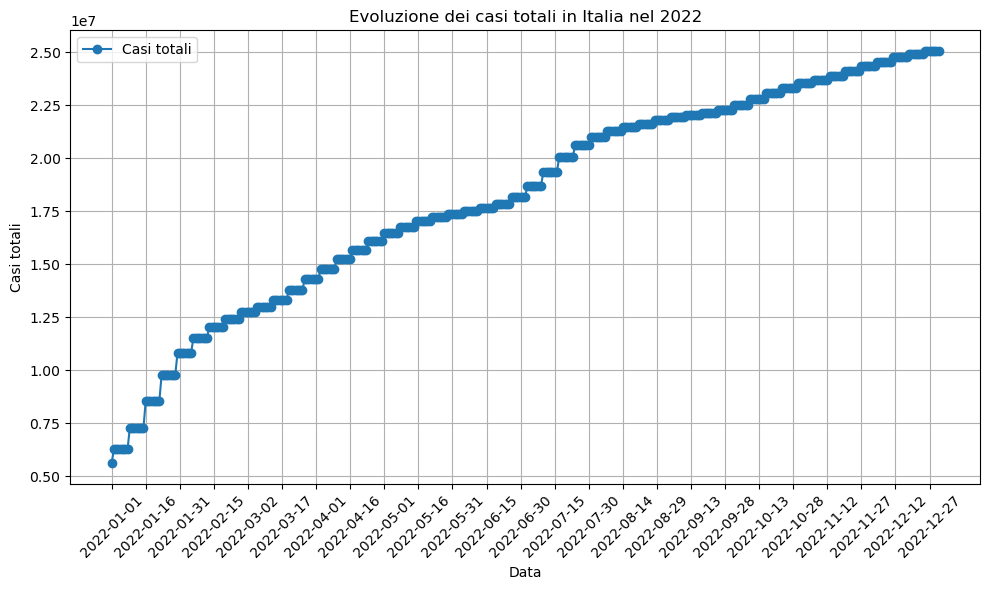

In [21]:
import matplotlib.pyplot as plt

# Filtrare i dati relativi all'Italia nel 2022
italy_2022 = covid_data.query("location == 'Italy' and date.str.startswith('2022')")

# Creare un campione di date da visualizzare (ad esempio, ogni 10 giorni)
sample_dates = italy_2022.iloc[::15]['date']

# Creare il grafico per i casi totali rispetto alla data per l'Italia nel 2022
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], marker='o', linestyle='-', label='Casi totali')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(sample_dates, rotation=45)  # Utilizzare solo le date del campione sull'asse x
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

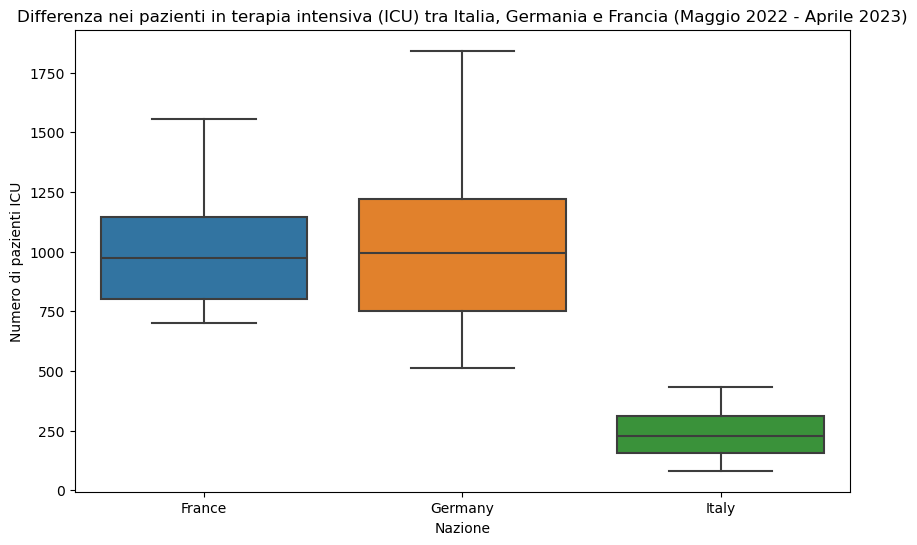

In [23]:
import seaborn as sns
# Filtrare i dati per Italia, Germania e Francia da maggio 2022 ad aprile 2023
countries = ['Italy', 'Germany', 'France']
filtered_data = covid_data[(covid_data['location'].isin(countries)) & 
                           (covid_data['date'] >= '2022-05-01') &
                           (covid_data['date'] <= '2023-04-30')]

# Visualizzare la differenza nei pazienti ICU tramite un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='location', y='icu_patients')
plt.title('Differenza nei pazienti in terapia intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti ICU')
plt.show()

In [28]:
# Filtrare i dati per Italia, Germania, Francia e Spagna nel 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
filtered_data_2023 = covid_data[(covid_data['location'].isin(countries)) & 
                                (covid_data['date'] >= '2023-01-01') &
                                (covid_data['date'] <= '2023-12-31')]

filtered_data_2023

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
118123,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,122180.83,6.64,25.88,1886.7708
118124,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118125,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118126,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118127,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329226,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
329227,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
329228,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
329229,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
